#Performing **Logistic Regression** (On Heart Disease Dataset)

In [3]:
#Importig Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
#Step 2: Load the Kaggle Heart Disease Dataset
df = pd.read_csv("heart.csv")
df.head(3)  # Display the first few rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


#**Perform EDA**



In [5]:
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [6]:
# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 723


In [7]:
print(df.describe())


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [9]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [11]:
# Check value counts of target variable
print("\nClass Distribution:")
print(df['target'].value_counts())


Class Distribution:
target
1    526
0    499
Name: count, dtype: int64


<ipython-input-12-7a3c1992fb2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette=['blue', 'orange'])


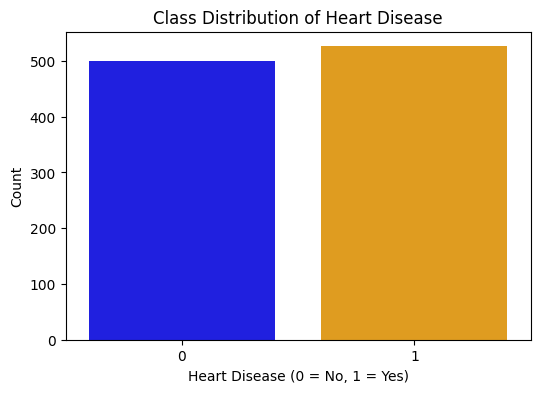

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'], palette=['blue', 'orange'])
plt.title("Class Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Perform all necessary Pre_processing**


In [13]:
#we can apply balancing technique but data is not highly imbalanced
#this code file is proper for different types of binary classifier , so learn its implementation

**Split Data into X and Y**

In [14]:
#Split Data into X and Y
y=df.pop('target')
x=df

In [15]:
#Split Data into Train Test Dataser
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


#**Applying ML Binary Classifier algorithm**

#Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
# ============== Logistic Regression ============== #
LR = LogisticRegression()
ModelLR = LR.fit(xtrain, ytrain)
PredictionLR = LR.predict(xtest)

print("=====================Logistic Regression Training Accuracy=============")
print(LR.score(xtrain, ytrain) * 100)

print("=====================Logistic Regression Testing Accuracy=============")
print(accuracy_score(ytest, PredictionLR) * 100)

print(classification_report(ytest, PredictionLR))
print(confusion_matrix(ytest, PredictionLR))


=====================Logistic Regression Training Accuracy=============
85.60975609756098
=====================Logistic Regression Testing Accuracy=============
87.3170731707317
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.85      0.89      0.87        98

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

[[92 15]
 [11 87]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Hyperparameter Tuning

In [17]:
# Step 1: Train Logistic Regression with 'newton-cg' Solver
log_reg_solver = LogisticRegression(solver='newton-cg')
log_reg_solver.fit(xtrain, ytrain)

# Step 2: Make Predictions
ypred_solver = log_reg_solver.predict(xtest)

# Step 3: Evaluate the Model
print(f"Training Accuracy: {log_reg_solver.score(xtrain, ytrain) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(ytest, ypred_solver) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(ytest, ypred_solver))
print("\nConfusion Matrix:\n", confusion_matrix(ytest, ypred_solver))


Training Accuracy: 85.00%
Testing Accuracy: 87.80%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       107
           1       0.86      0.89      0.87        98

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205


Confusion Matrix:
 [[93 14]
 [11 87]]


In [19]:
import warnings
warnings.filterwarnings('ignore')  # Suppress convergence warnings for cleaner output

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# List of solvers to test
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# Define allowed penalties for each solver
allowed_penalties = {
    'liblinear': ['l1', 'l2'],
    'newton-cg': ['l2'],
    'lbfgs': ['l2'],
    'sag': ['l2'],
    'saga': ['l1', 'l2']
}

# Other hyperparameters to test
C_values = [0.1, 1.0, 10.0]
class_weights = [None, 'balanced']
tol_values = [1e-4, 1e-3]

for solver in solvers:
    print("========== Solver:", solver, "==========")
    for penalty in allowed_penalties[solver]:
        for C in C_values:
            for class_weight in class_weights:
                for tol in tol_values:
                    print(f"--- Params: penalty={penalty}, C={C}, class_weight={class_weight}, tol={tol} ---")
                    model = LogisticRegression(
                        solver=solver,
                        penalty=penalty,
                        C=C,
                        class_weight=class_weight,
                        tol=tol,
                        max_iter=1000,
                        random_state=42
                    )
                    model.fit(xtrain, ytrain)
                    ypred = model.predict(xtest)

                    print(f"Training Accuracy: {model.score(xtrain, ytrain)*100:.2f}%")
                    print(f"Testing Accuracy: {accuracy_score(ytest, ypred)*100:.2f}%")
                    print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
                    print("-" * 50)
    print("\n\n")


========== Solver: liblinear ==========
--- Params: penalty=l1, C=0.1, class_weight=None, tol=0.0001 ---
Training Accuracy: 84.27%
Testing Accuracy: 86.83%
Confusion Matrix:
 [[90 17]
 [10 88]]
--------------------------------------------------
--- Params: penalty=l1, C=0.1, class_weight=None, tol=0.001 ---
Training Accuracy: 84.27%
Testing Accuracy: 86.83%
Confusion Matrix:
 [[90 17]
 [10 88]]
--------------------------------------------------
--- Params: penalty=l1, C=0.1, class_weight=balanced, tol=0.0001 ---
Training Accuracy: 83.66%
Testing Accuracy: 86.83%
Confusion Matrix:
 [[91 16]
 [11 87]]
--------------------------------------------------
--- Params: penalty=l1, C=0.1, class_weight=balanced, tol=0.001 ---
Training Accuracy: 83.66%
Testing Accuracy: 86.83%
Confusion Matrix:
 [[91 16]
 [11 87]]
--------------------------------------------------
--- Params: penalty=l1, C=1.0, class_weight=None, tol=0.0001 ---
Training Accuracy: 85.85%
Testing Accuracy: 87.80%
Confusion Matrix:
